In [1]:
!pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl

Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... - done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c60a7677458585d1c08d9072fd234dcde4577ce8001da2f7bf02bdcbd10fa1bf
  Stored in directory: /root/.cache/pip/wheels/6b/b5/e0/4c79e15c0b5f2c15ecf613c720bb20daab20a666eb67135155
Successfully built autograd-gamma
Processing /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


In [2]:
import pandas as pd

train=pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test=pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')

pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)

Total columns with NaN values: 50
Columns with NaN values: 
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
arrhythmia                 2202
hla_low_res_6              3270
vent_hist                   259
renal_issue                1915
pulm_severe                2135
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
obesity                    1760
mrd_hct                   16597
in_vivo_tcd                 225
tce_match                 18996
hla_match_a_high           4301
hepatic_seve

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.290,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.230,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.810,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,NaN,ALL,6.0,-/-,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2018,No,Negative,Yes,Fully matched,2.0,No,24.212,Yes,2.0,No,51.136,2.0,FK+ MTX +- others(not MMF),NaN,M-F,2.0,More than one race,0.0,NaN,NaN,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,Peripheral blood,No,No,No,AML,3.0,-/+,6.0,2.0,G/G,4.0,1.0,No,2.0,2.0,PB,TBD,RIC,Hispanic or Latino,2017,No,Positive,No,NaN,1.0,No,30.770,No,1.0,No,18.075,2.0,Cyclophosphamide +- others,No,M-F,1.0,Native Hawaiian or other Pacific Islander,3.0,90.0,No,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,Peripheral blood,No,NaN,NaN,IPA,6.0,-/+,10.0,2.0,G/G,6.0,2.0,NaN,2.0,2.0,PB,Poor,MAC,Not Hispanic or Latino,2018,No,NaN,No,GvH non-permissive,2.0,No,22.627,No,2.0,NaN,51.005,2.0,FK+ MMF +- others,NaN,M-F,2.0,Native Hawaiian or other Pacific Islander,5.0,90.0,NaN,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,

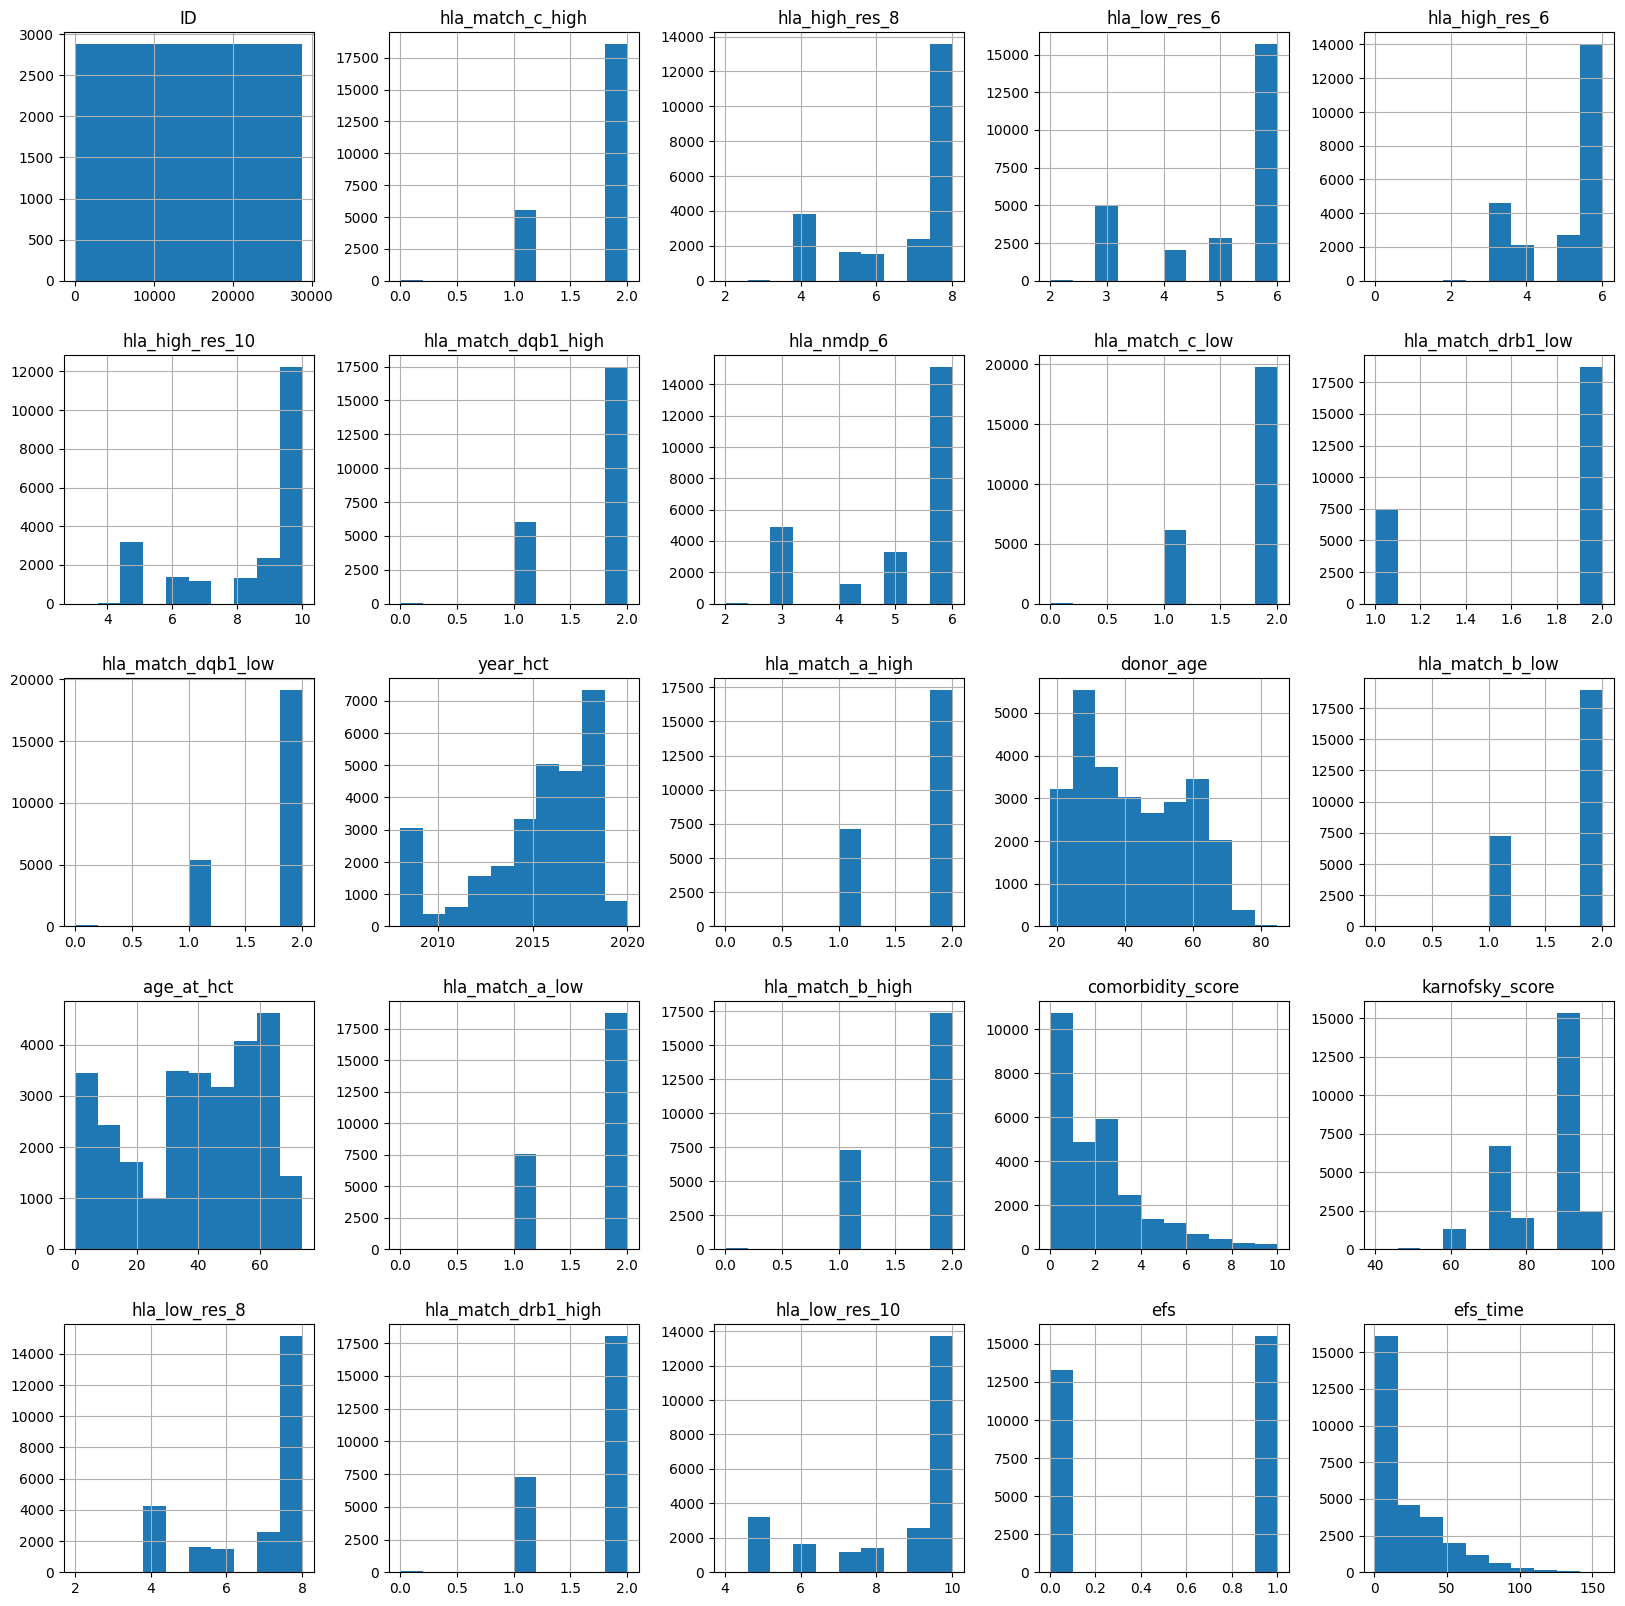

In [3]:
# Check for columns with NaN values
nan_columns = train.isna().sum()

# Print the number of columns with NaN values
nan_columns_with_values = nan_columns[nan_columns > 0]

# Print statistics about columns with NaN values
print(f"Total columns with NaN values: {len(nan_columns_with_values)}")
print(f"Columns with NaN values: \n{nan_columns_with_values}")

train.hist(figsize=(20, 20))
train

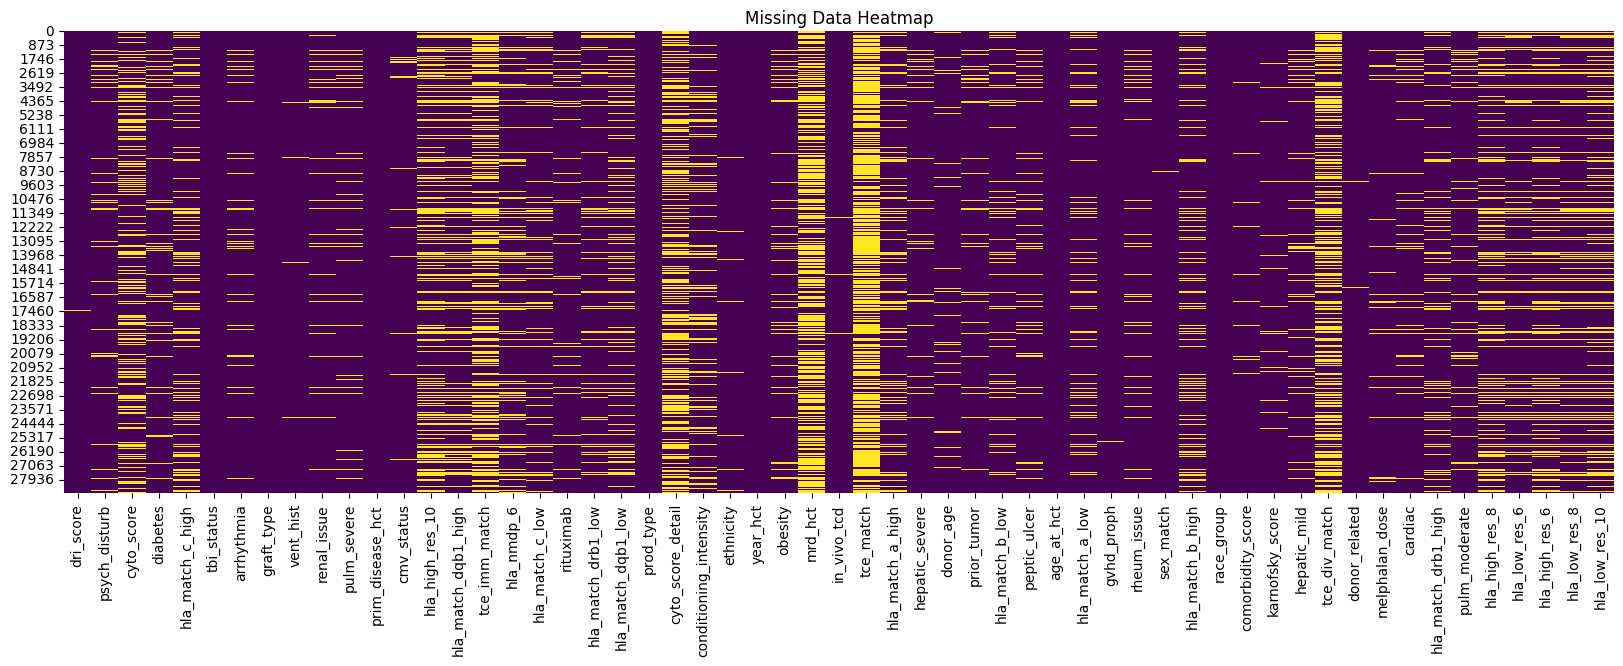

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

features=['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'tbi_status',
          'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct',
          'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low',
          'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
          'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age',
          'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match',
          'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
          'melphalan_dose', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_low_res_8', 'hla_low_res_10']

# Set the chart size (width, height in inches)
plt.figure(figsize=(20, 6))  # Increase the width for a wider chart

# Visualizing missing data
sns.heatmap(train[features].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [5]:
# Standard library imports
import numpy as np
import pandas as pd

# Machine learning models
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                               StackingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (Ridge, ElasticNet, Lasso)
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Preprocessing tools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Model evaluation and analysis
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

# Separate the numerical and categorical columns from the 'features' list
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(exclude=['object']).columns.tolist()

# Exclude non-feature columns
excluded_columns = ['ID', 'efs_time', 'efs']
numerical_cols = [col for col in numerical_cols if col not in excluded_columns]

# Fill missing values for numerical and categorical features
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].median())
train[categorical_cols] = train[categorical_cols].fillna("Unknown")

test[numerical_cols] = test[numerical_cols].fillna(test[numerical_cols].median())
test[categorical_cols] = test[categorical_cols].fillna("Unknown")

# Define models
model = CatBoostRegressor(
    iterations=12248,  # Number of boosting iterations (trees) to train. More iterations generally improve model performance, but may lead to overfitting if too high.
    learning_rate=0.009258440249292623,  # The learning rate. A lower value can help with more stable convergence, but requires more iterations.
    depth=6,  # The depth of the individual decision trees. Larger depths can capture more complex patterns but may overfit.
    random_state=42,  # Set a random seed for reproducibility. Ensures the model training is deterministic.
    verbose=1000,  # Print logs every 100 iterations during training. Helps monitor the model's progress and detect issues like overfitting.
    loss_function='RMSE',  # Specifies the loss function to optimize. 'Huber' is robust to outliers by balancing RMSE and MAE.
    early_stopping_rounds=100, # Stops if validation score doesn't improve for 100 rounds
)

def transform_survival_probability_kaplan_meier(df, time_col='efs_time', event_col='efs'):
    # Initialize the Kaplan-Meier fitter for survival analysis
    kmf = KaplanMeierFitter()
    
    # Fit the Kaplan-Meier estimator with the provided time and event columns
    kmf.fit(df[time_col], df[event_col])
    
    # Calculate the survival probability at the specified times
    y = kmf.survival_function_at_times(df[time_col]).values
    
    # Return the computed survival probabilities
    return y

def transform_survival_probability_nelson_aalen(df, time_col='efs_time', event_col='efs'):
    # Initialize the Nelson-Aalen fitter
    naf = NelsonAalenFitter()

    # Fit the Nelson-Aalen estimator with the provided time and event columns
    naf.fit(df[time_col], df[event_col])

    # Calculate cumulative hazard at the specified times
    y = -naf.cumulative_hazard_at_times(df[time_col]).values

    return y

# Convert the 'efs' column to integers (to represent event indicators: 0 or 1)
train['efs'] = train['efs'].astype(int)

# Transform the target variable ('efs') into survival probabilities using the Nelson-Aalen estimator
y = transform_survival_probability_nelson_aalen(train, 'efs_time', 'efs')

# Select the features for training
X = train[features]

# Split the data into training and validation sets
# Here, 'y' is the transformed survival probabilities, and 'X' contains the predictor features
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train                    

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,Unknown,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,10.0,2.0,Unknown,6.0,2.0,No,2.0,2.0,BM,Unknown,Unknown,Not Hispanic or Latino,2016,No,Unknown,Yes,Unknown,2.0,No,40.063,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,Unknown,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.290,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1,4.672
2,2,N/A - non-malignant indication,No,Unknown,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Unknown,Unknown,Not Hispanic or Latino,2019,No,Unknown,Yes,Unknown,2.0,No,40.063,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.230,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,102.349
4,4,High,No,Unknown,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,Unknown,5.0,2.0,No,2.0,2.0,PB,Unknown,MAC,Hispanic or Latino,2018,No,Unknown,Yes,Unknown,2.0,No,56.810,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,Unknown,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,Unknown,ALL,6.0,-/-,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2018,No,Negative,Yes,Fully matched,2.0,No,24.212,Yes,2.0,No,51.136,2.0,FK+ MTX +- others(not MMF),Unknown,M-F,2.0,More than one race,0.0,90.0,Unknown,Bi-directional non-permissive,Unknown,"N/A, Mel not given",8.0,Unknown,2.0,No,10.0,0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,Peripheral blood,No,No,No,AML,3.0,-/+,6.0,2.0,G/G,4.0,1.0,No,2.0,2.0,PB,TBD,RIC,Hispanic or Latino,2017,No,Positive,No,Unknown,1.0,No,30.770,No,1.0,No,18.075,2.0,Cyclophosphamide +- others,No,M-F,1.0,Native Hawaiian or other Pacific Islander,3.0,90.0,No,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1,4.892
28797,28797,TBD cytogenetics,Unknown,Poor,Unknown,2.0,8.0,No TBI,Unknown,6.0,Peripheral blood,No,Unknown,Unknown,IPA,6.0,-/+,10.0,2.0,G/G,6.0,2.0,Unknown,2.0,2.0,PB,Poor,MAC,Not Hispanic or Latino,2018,No,Unknown,No,GvH non-permissive,2.0,No,22.627,No,2.0,Unknown,51.005,2.0,FK+ MMF +- others

In [6]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from lifelines.utils import concordance_index
import optuna
import numpy as np

# Custom scoring function for concordance index
def score(y_true, y_pred):
    y_pred = np.array(y_pred).flatten()  
    c_index = concordance_index(y_true, y_pred)
    return c_index

def objective(trial):
    # Define hyperparameter search space
    params = {
        "depth": 6, 
        "learning_rate": 0.009258440249292623, 
        "iterations": 5628
    }
    
    # Initialize the CatBoost model with selected hyperparameters
    model = CatBoostRegressor(cat_features=categorical_cols, verbose=1000, **params)
    
    # Perform 3-fold cross-validation and compute the mean concordance index score
    mean_score = np.mean(
        cross_val_score(model, X, y, cv=3, scoring=make_scorer(score, greater_is_better=True))
    )
    
    return mean_score  # Optuna maximizes this score

# Create an Optuna study object to maximize the concordance index
#study = optuna.create_study(direction="maximize")

# Run Bayesian optimization for 50 trials
#study.optimize(objective, n_trials=50)  

# Print the best hyperparameter combination found
#print("Best hyperparameters:", study.best_params)

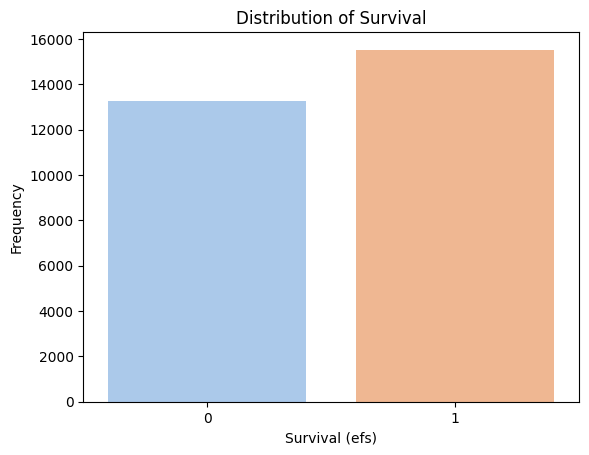

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


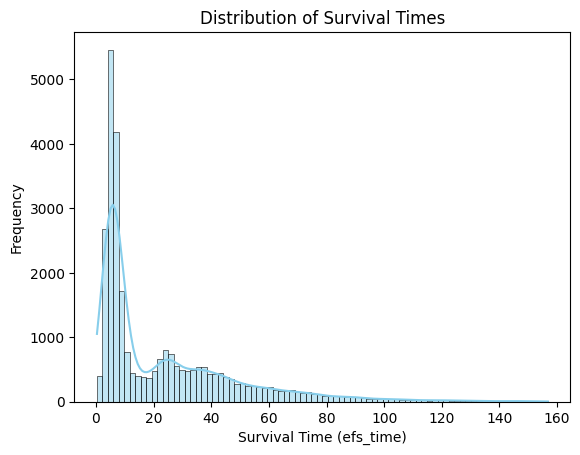

In [7]:
sns.countplot(x=train['efs'], palette='pastel')
plt.title('Distribution of Survival')
plt.xlabel('Survival (efs)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train['efs_time'], kde=True, color='skyblue')
plt.title('Distribution of Survival Times')
plt.xlabel('Survival Time (efs_time)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

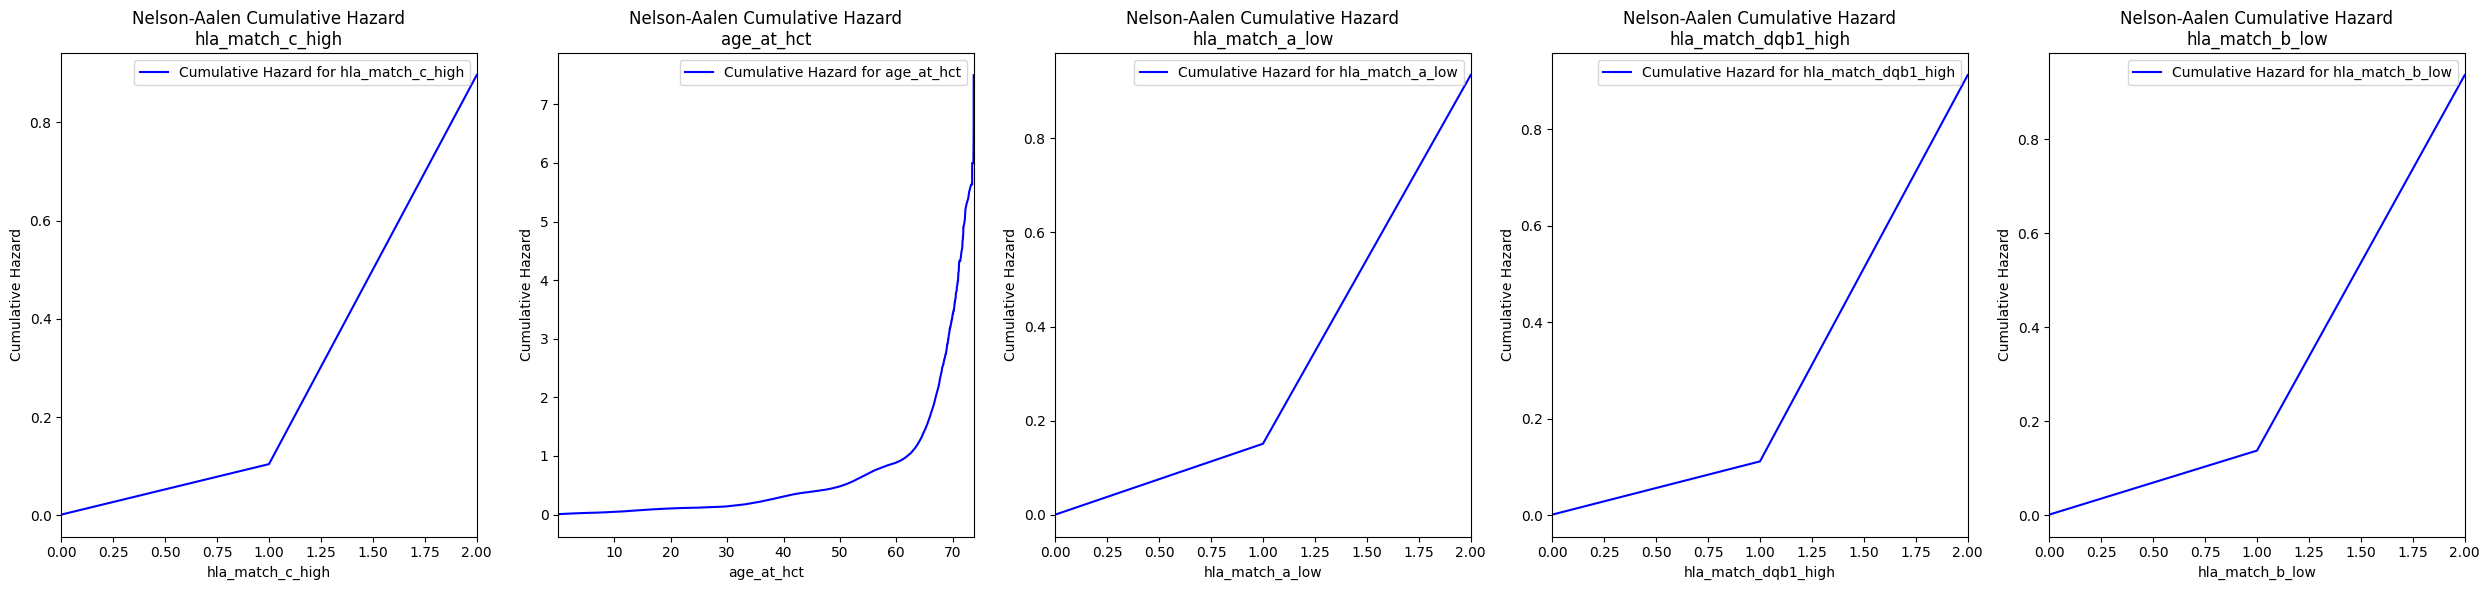

Min value of hla_match_c_high: 0.0
Max value of hla_match_c_high: 2.0
Min value of age_at_hct: 0.044
Max value of age_at_hct: 73.726
Min value of hla_match_a_low: 0.0
Max value of hla_match_a_low: 2.0
Min value of hla_match_dqb1_high: 0.0
Max value of hla_match_dqb1_high: 2.0
Min value of hla_match_b_low: 0.0
Max value of hla_match_b_low: 2.0


In [8]:
from lifelines import NelsonAalenFitter
import seaborn as sns
import matplotlib.pyplot as plt	

# List of the most important feature names (you can replace this with your actual list)
features_for_chart = ['hla_match_c_high', 'age_at_hct', 'hla_match_a_low', 'hla_match_dqb1_high', 'hla_match_b_low']

# Create a figure and axes for side-by-side plotting
fig, axes = plt.subplots(1, len(features_for_chart), figsize=(25, 6))

# Iterate over each feature and plot the corresponding cumulative hazard
for i, feature in enumerate(features_for_chart):
    # Create a copy of the relevant columns to avoid modifying the original dataset
    temp_data = train[[feature, 'efs']].copy()

    # Replace NaN values in the copied data
    temp_data[feature] = temp_data[feature].fillna(temp_data[feature].median())
    temp_data['efs'] = temp_data['efs'].fillna(temp_data['efs'].median())

    # Fit the Nelson-Aalen model using the temporary dataset
    naf = NelsonAalenFitter()
    naf.fit(temp_data[feature], event_observed=temp_data['efs'])

    # Plot the cumulative hazard function in the respective subplot
    sns.lineplot(
        x=naf.cumulative_hazard_.index, 
        y=naf.cumulative_hazard_['NA_estimate'], 
        label=f'Cumulative Hazard for {feature}', 
        color='blue', ax=axes[i]
    )
    
    # Title, labels, and limits for each subplot
    axes[i].set_title(f'Nelson-Aalen Cumulative Hazard\n{feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Cumulative Hazard')
    axes[i].set_xlim(left=temp_data[feature].min(), right=temp_data[feature].max())
    axes[i].legend()

# Adjust the layout
plt.tight_layout()
plt.show()

# Print the min and max values for the specified features
for feature in features_for_chart:
    print(f"Min value of {feature}: {train[feature].min()}")
    print(f"Max value of {feature}: {train[feature].max()}")

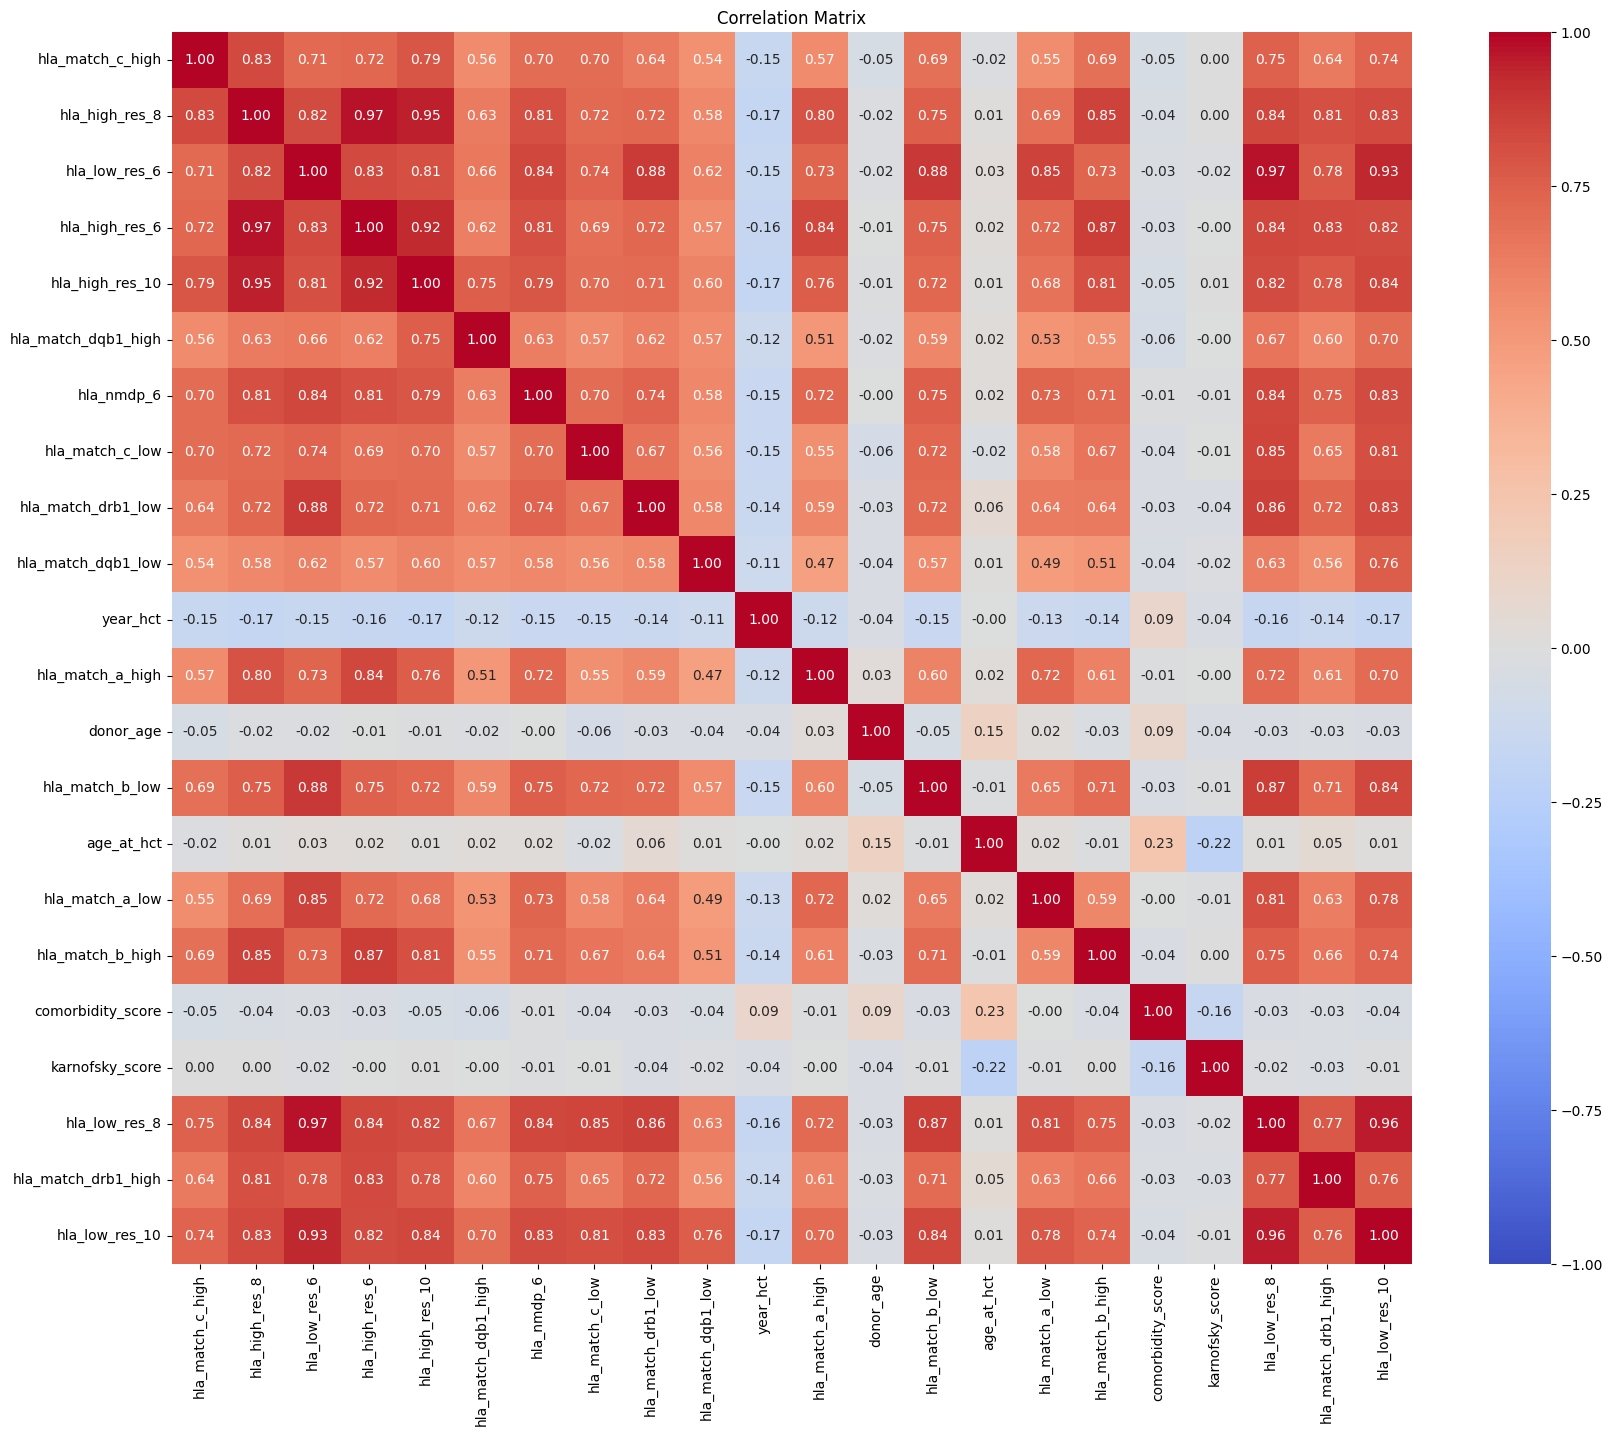

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract numerical columns for correlation analysis
X_cor = X[numerical_cols].copy()

# Calculate the correlation matrix
correlation_matrix = X_cor.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Define a threshold for "bad" correlation
threshold = 0.9

# Flatten the correlation matrix
correlation_pairs = correlation_matrix.unstack()

# Filter to find pairs with bad correlation (excluding self-correlation)
bad_correlation_pairs = correlation_pairs[(correlation_pairs.abs() > threshold) & (correlation_pairs != 1)]

# Remove duplicate pairs (since correlation is symmetric)
bad_correlation_pairs = bad_correlation_pairs[::2]

# Print the bad correlation pairs
print("Column pairs with bad correlation:")
for (col1, col2), value in bad_correlation_pairs.items():
    print(f"{col1} - {col2}: {value:.3f}")

Column pairs with bad correlation:
hla_high_res_8 - hla_high_res_6: 0.969
hla_low_res_6 - hla_low_res_8: 0.974
hla_high_res_6 - hla_high_res_8: 0.969
hla_high_res_10 - hla_high_res_8: 0.952
hla_low_res_8 - hla_low_res_6: 0.974
hla_low_res_10 - hla_low_res_6: 0.935


Optimal number of clusters: 4 with silhouette score: 0.47


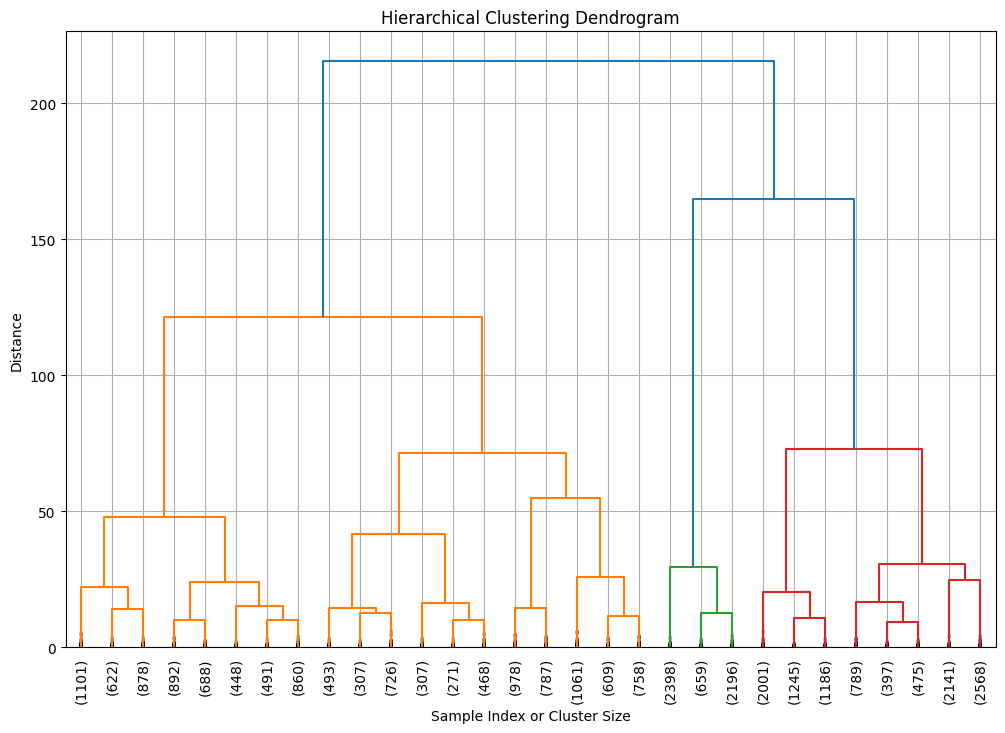

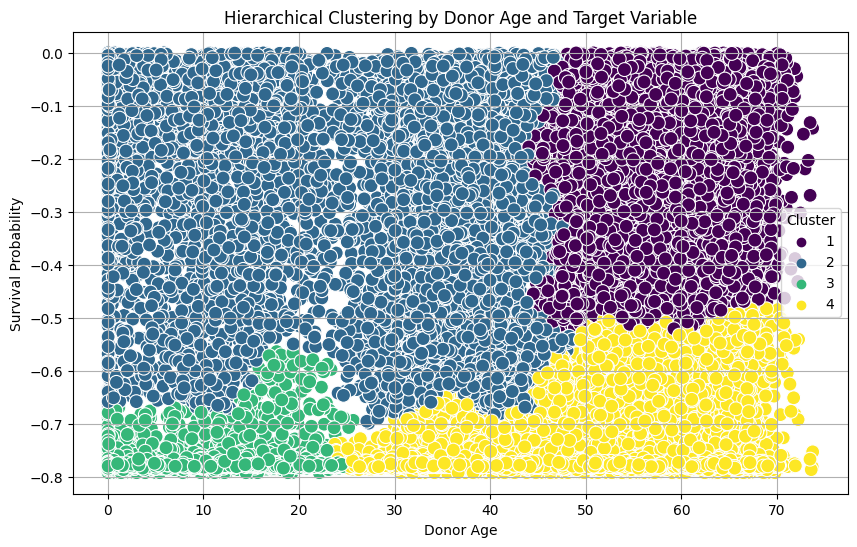

In [11]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score

# Prepare cluster data by selecting columns excluding the ones to be dropped
cluster_data = pd.DataFrame({
    'age_at_hct': train['age_at_hct'],  # Ensure this matches the feature column
    'target': y
})

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Determine the optimal number of clusters using silhouette score
max_clusters = 10
best_num_clusters = 2
best_silhouette_score = -1

for n_clusters in range(2, max_clusters + 1):
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = n_clusters

print(f"Optimal number of clusters: {best_num_clusters} with silhouette score: {best_silhouette_score:.2f}")

# Assign clusters using the optimal number
cluster_data['cluster'] = fcluster(linkage_matrix, best_num_clusters, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_data,
    x='age_at_hct',
    y='target',
    hue='cluster',
    palette='viridis',
    s=100
)
plt.title('Hierarchical Clustering by Donor Age and Target Variable')
plt.xlabel('Donor Age')
plt.ylabel('Survival Probability')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_summary = cluster_data.groupby('cluster').agg(['mean', 'median', 'std'])
print(cluster_summary)

        age_at_hct                       target                    
              mean  median        std      mean    median       std
cluster                                                            
1        58.532741  59.168   6.632853 -0.234232 -0.225120  0.143810
2        26.689263  31.938  13.992152 -0.297287 -0.279090  0.193774
3         8.471170   7.961   7.084093 -0.771936 -0.778547  0.023702
4        49.844598  51.319  12.013595 -0.746704 -0.777116  0.067410


<Axes: xlabel='cluster', ylabel='age_at_hct'>

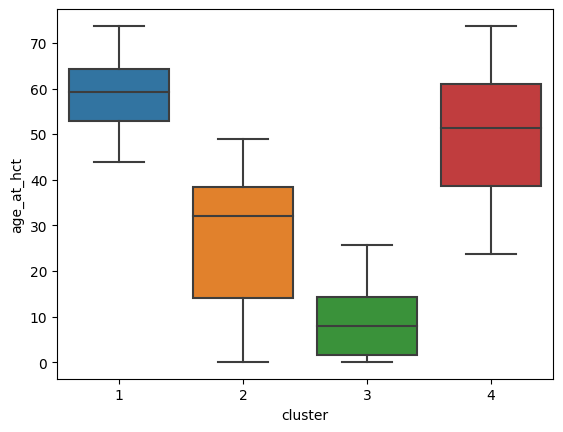

In [13]:
sns.boxplot(data=cluster_data, x='cluster', y='age_at_hct')

In [14]:
# Train the model
model.fit(X, y, cat_features=categorical_cols)

0:	learn: 0.2717612	total: 153ms	remaining: 31m 16s
1000:	learn: 0.2413995	total: 1m 27s	remaining: 16m 24s
2000:	learn: 0.2351910	total: 2m 57s	remaining: 15m 10s
3000:	learn: 0.2316470	total: 4m 27s	remaining: 13m 44s
4000:	learn: 0.2288316	total: 5m 57s	remaining: 12m 17s
5000:	learn: 0.2264259	total: 7m 27s	remaining: 10m 48s
6000:	learn: 0.2243237	total: 9m 1s	remaining: 9m 23s
7000:	learn: 0.2224256	total: 10m 32s	remaining: 7m 54s
8000:	learn: 0.2205533	total: 12m 4s	remaining: 6m 24s
9000:	learn: 0.2187004	total: 13m 37s	remaining: 4m 54s
10000:	learn: 0.2169509	total: 15m 8s	remaining: 3m 24s
11000:	learn: 0.2153052	total: 16m 40s	remaining: 1m 53s
12000:	learn: 0.2136476	total: 18m 11s	remaining: 22.5s
12247:	learn: 0.2132448	total: 18m 34s	remaining: 0us


In [15]:
X_test = test[features]
# Get the feature importance
importances = model.get_feature_importance()

# Combine numerical and categorical feature names
num_features = numerical_cols
cat_features = categorical_cols
feature_names = list(num_features) + list(cat_features)
# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': list(feature_names),
    'Importance': importances
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
pd.set_option('display.max_rows', None)
feature_importance_df

,Feature,Importance
0,hla_match_c_high,8.523740
25,diabetes,7.709556
23,psych_disturb,7.014860
32,prim_disease_hct,5.090046
36,prod_type,4.849281
43,tce_match,4.775177
44,hepatic_severe,4.409035
11,hla_match_a_high,4.403795
22,dri_score,3.565939
38,conditioning_intensity,3.429339


In [16]:
# Submission preparation (if required)
predictions = model.predict(X_test)

submission = pd.DataFrame({
    'ID': test['ID'],  # Ensure test data contains an ID column
    'prediction': predictions
})
submission.to_csv('submission.csv', index=False)

submission

,ID,prediction
0,28800,-0.673294
1,28801,-0.415476
2,28802,-0.784284
